# Getting started with classification


# Classification

> Robust toolkit for data science and machine learning tasks in Python. It provides a wide range of algorithms for classification, regression, clustering, dimensionality reduction, and model selection.

Sklearn also provides a wide range of functionality:

- **Model Evaluation and Selection:** Sklearn provides extensive tools not just for building models but also for evaluating their performance through a variety of metrics and scoring methods. It offers utilities for cross-validation and hyperparameter tuning, making the process of model selection rigorous and straightforward.

- **Preprocessing and Feature Selection**: With its comprehensive set of preprocessing modules, sklearn helps in transforming raw datasets into a form that is suitable for feeding into machine learning algorithms. This includes scaling, normalization, encoding categorical variables, and selecting informative features.
  


# Cleaning Data Example

- We will work with cuisine dataset and clean it before using it for machine learning


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df  = pd.read_csv('./cuisines.csv')

In [3]:
df.head()

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,65,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,66,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,67,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,68,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,69,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Rows: Each row in the dataset represents a unique recipe.

Columns: The columns include a mix of identifiers and the cuisine type each recipe belongs to, and a wide range of ingredients used across these recipes. Each ingredient might be represented as a binary indicator (0 or 1) to denote its absence or presence in the recipe, or possibly as counts if the dataset tracks the number of times an ingredient is used in a recipe.

cuisine: This column categorizes each recipe into a specific cuisine, indicating the regional or cultural origin of the recipe (e.g., Italian, Mexican, Chinese).

Unnamed: 0: This could be an auto-generated column when the dataset is imported or loaded into a DataFrame, often representing an index or an unnamed primary key column.


> Let us observe the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2448 entries, 0 to 2447
Columns: 385 entries, Unnamed: 0 to zucchini
dtypes: int64(384), object(1)
memory usage: 7.2+ MB


How many cuisine we have?

In [5]:
df["cuisine"].unique()

array(['indian', 'thai', 'chinese', 'japanese', 'korean'], dtype=object)

> much data is available per cuisine?

In [6]:
thai_df = df[(df.cuisine == "thai")]
japanese_df = df[(df.cuisine == "japanese")]
chinese_df = df[(df.cuisine == "chinese")]
indian_df = df[(df.cuisine == "indian")]
korean_df = df[(df.cuisine == "korean")]

print(f'thai df: {thai_df.shape}')
print(f'japanese df: {japanese_df.shape}')
print(f'chinese df: {chinese_df.shape}')
print(f'indian df: {indian_df.shape}')
print(f'korean df: {korean_df.shape}')

thai df: (289, 385)
japanese df: (320, 385)
chinese df: (442, 385)
indian df: (598, 385)
korean df: (799, 385)


In [7]:
# find unique value for each cuisne
df["cuisine"].value_counts()

cuisine
korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: count, dtype: int64

- The dataset is imbalance, and we need to balance it before using it to train ML



## Discovering ingredients



How many ingredients do we have in the dataset, and what are the most common ones or top ten?

In [8]:
df

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,65,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,66,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,67,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,68,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,69,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2443,57686,japanese,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2444,57687,japanese,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2445,57688,japanese,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2446,57689,japanese,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Let us transpose the data and remove unncesay columns

In [9]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,2438,2439,2440,2441,2442,2443,2444,2445,2446,2447
Unnamed: 0,65,66,67,68,69,70,71,72,73,74,...,57681,57682,57683,57684,57685,57686,57687,57688,57689,57690
cuisine,indian,indian,indian,indian,indian,indian,indian,indian,indian,indian,...,japanese,japanese,japanese,japanese,japanese,japanese,japanese,japanese,japanese,japanese
almond,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
angelica,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
anise,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wood,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
yam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
yeast,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
yogurt,0,0,0,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
ingredient_df = df.T.drop(['cuisine','Unnamed: 0'])
ingredient_df

,0,1,2,3,4,5,6,7,8,9,...,2438,2439,2440,2441,2442,2443,2444,2445,2446,2447
almond,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
angelica,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
anise,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
anise_seed,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
apple,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wood,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
yam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
yeast,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
yogurt,0,0,0,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
ingredient_df = df.T.drop(['cuisine','Unnamed: 0']).sum(axis=1)
ingredient_df


almond         45
angelica        0
anise           1
anise_seed      7
apple          34
             ... 
wood            0
yam             4
yeast          38
yogurt        145
zucchini       21
Length: 383, dtype: object

In [12]:
ingredient_df = df.T.drop(['cuisine','Unnamed: 0']).sum(axis=1).to_frame('value')
ingredient_df


,value
almond,45
angelica,0
anise,1
anise_seed,7
apple,34
...,...
wood,0
yam,4
yeast,38
yogurt,145


But, we have cases where we have zero, which means no any cuisne use that ingredient and we can remove it from the dataset

In [13]:
ingredient_df.T

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
value,45,0,1,7,34,0,13,0,6,0,...,0,2,51,10,166,0,4,38,145,21


In [14]:
ingredient_df.T != 0

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
value,True,False,True,True,True,False,True,False,True,False,...,False,True,True,True,True,False,True,True,True,True


In [15]:
ingredient_df = ingredient_df[(ingredient_df.T != 0).any()]
ingredient_df

,value
almond,45
anise,1
anise_seed,7
apple,34
apricot,13
...,...
wine,166
yam,4
yeast,38
yogurt,145


Still, we can do more. What is it?

In [16]:
ingredient_df.sort_values(by='value', ascending=False, inplace=False)

,value
garlic,1226
soy_sauce,979
cayenne,975
ginger,907
scallion,844
...,...
chayote,1
champagne_wine,1
catfish,1
brussels_sprout,1


Putting all together as a function

In [17]:
def create_ingredient_df(df):
    ingredient_df = df.T.drop(['cuisine','Unnamed: 0']).sum(axis=1).to_frame('value')
    ingredient_df = ingredient_df[(ingredient_df.T != 0).any()]
    ingredient_df = ingredient_df.sort_values(by='value', ascending=False,
    inplace=False)
    return ingredient_df

## Let us observe thai ingredient

In [18]:
df

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,65,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,66,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,67,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,68,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,69,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2443,57686,japanese,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2444,57687,japanese,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2445,57688,japanese,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2446,57689,japanese,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
thai_df = df[(df.cuisine == "thai")]
thai_df
# print(len(thai_df))

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
274,2333,thai,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
275,2334,thai,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
276,2335,thai,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
277,2336,thai,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
278,2337,thai,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2358,55615,thai,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2359,55616,thai,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2360,55617,thai,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2361,55618,thai,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
thai_ingredient_df = create_ingredient_df(thai_df)
thai_ingredient_df

,value
garlic,173
fish,153
cayenne,136
cilantro,121
ginger,114
...,...
ham,1
kale,1
buckwheat,1
roasted_beef,1


Plot it

<Axes: >

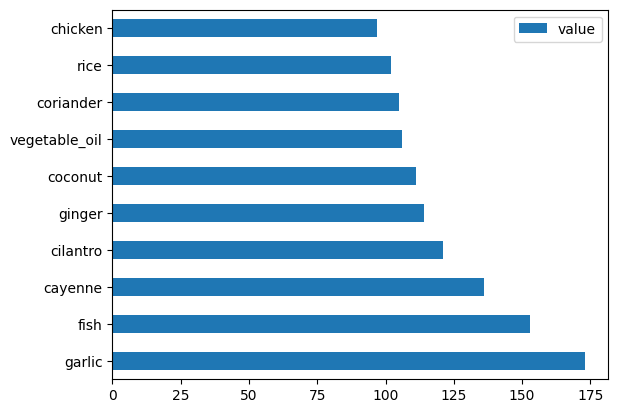

In [21]:
thai_ingredient_df.head(10).plot.barh()

## japanese data:

<Axes: >

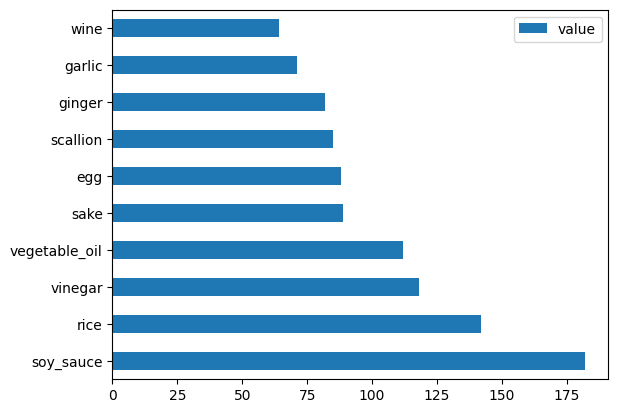

In [22]:
japanese_ingredient_df = create_ingredient_df(japanese_df)
japanese_ingredient_df.head(10).plot.barh()

## Chinese data

<Axes: >

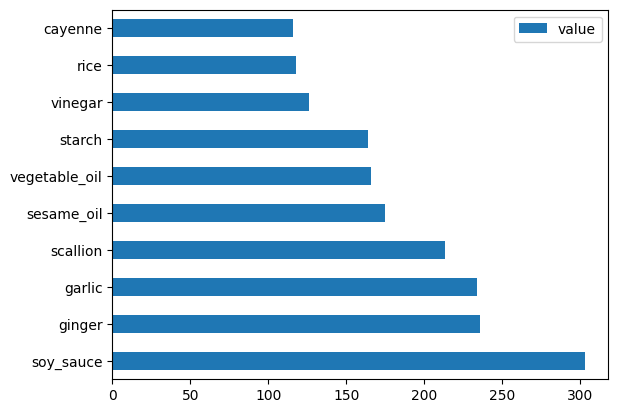

In [23]:
chinese_ingredient_df = create_ingredient_df(chinese_df)
chinese_ingredient_df.head(10).plot.barh()

## Indian 

<Axes: >

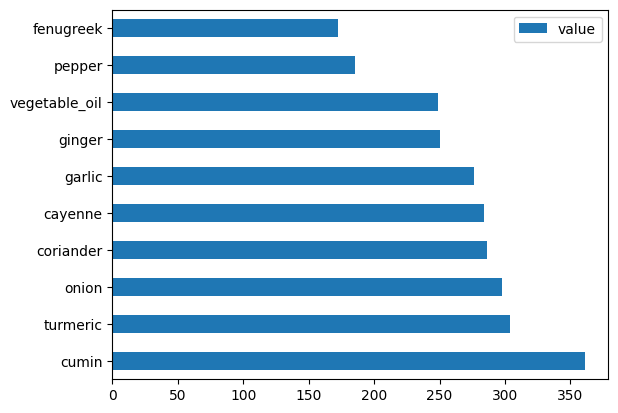

In [24]:
indian_ingredient_df = create_ingredient_df(indian_df)
indian_ingredient_df.head(10).plot.barh()

## Korea

<Axes: >

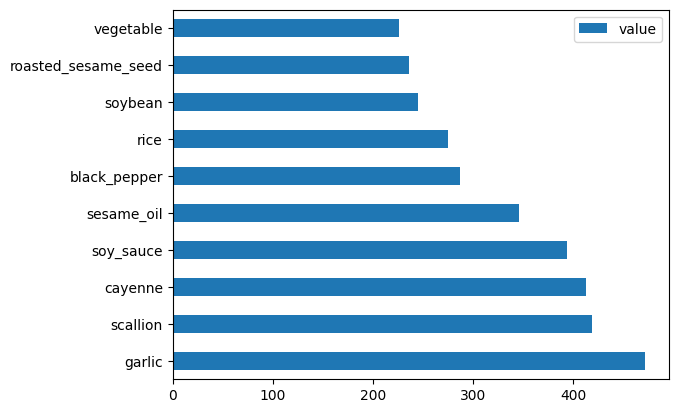

In [25]:
korean_ingredient_df = create_ingredient_df(korean_df)
korean_ingredient_df.head(10).plot.barh()

## What is common in the ingredients?

- We need distince ingredients
- So, we can drop the most common ingredients that create confusion between distinct cuisines
-  Common:  rice, garlic and ginger!

In [26]:
df

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,65,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,66,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,67,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,68,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,69,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2443,57686,japanese,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2444,57687,japanese,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2445,57688,japanese,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2446,57689,japanese,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
feature_df= df.drop(['cuisine','Unnamed: 0','rice','garlic','ginger'], axis=1) # feauture
labels_df = df.cuisine #.unique() # lables

In [28]:
feature_df.head()

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [29]:
labels_df

0         indian
1         indian
2         indian
3         indian
4         indian
          ...   
2443    japanese
2444    japanese
2445    japanese
2446    japanese
2447    japanese
Name: cuisine, Length: 2448, dtype: object

In [30]:
labels_df.unique()

array(['indian', 'thai', 'chinese', 'japanese', 'korean'], dtype=object)

In [31]:
# labels_df to dataframe
labels_df = pd.DataFrame(labels_df)

In [32]:
labels_df

,cuisine
0,indian
1,indian
2,indian
3,indian
4,indian
...,...
2443,japanese
2444,japanese
2445,japanese
2446,japanese


In [33]:
labels_df.value_counts()

cuisine 
korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: count, dtype: int64

# Balance the dataset

- Now that the data is have cleaned, we use SMOTE - "Synthetic Minority Over-sampling Technique" - to balance it.

> Imagine you're teaching a machine to recognize apples and oranges, but your dataset has 1000 apples and only 10 oranges. The machine might learn to always guess "apple," because that's usually right. This imbalance makes it hard for the machine to learn about oranges.



> SMOTE helps by creating additional, synthetic examples of oranges, making the dataset more balanced. Instead of simply duplicating existing oranges (which could make the machine just memorize these few examples), SMOTE generates new, plausible oranges. Here's how it does this:

- For each orange in the dataset, SMOTE finds its nearest neighbors.
  
- It draws a line between the orange and one of its neighbors.
  
- It picks a point on this line and creates a new, synthetic orange there.
  
- This process is repeated for each orange, until the dataset is balanced.

#### How SMOTE Works: Step-by-Step

1. Selection: Select a minority class sample.
   
2. Neighbors: Identify its k nearest neighbors in the minority class.
   
3. Synthesis: Choose one of these neighbors and place a new point at a random spot between the selected sample and its neighbor.
   
4. Balance: Continue this process until the classes are balanced.

In [34]:
feature_df

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2443,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2444,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2445,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
labels_df

,cuisine
0,indian
1,indian
2,indian
3,indian
4,indian
...,...
2443,japanese
2444,japanese
2445,japanese
2446,japanese


In [36]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
transformed_feature_df, transformed_label_df = oversample.fit_resample(feature_df, labels_df)

In [37]:
transformed_feature_df

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3992,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3993,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
transformed_label_df

,cuisine
0,indian
1,indian
2,indian
3,indian
4,indian
...,...
3990,thai
3991,thai
3992,thai
3993,thai


> By balancing your data, you'll have better results when classifying it. Think about a binary classification. If most of your data is one class, a ML model is going to predict that class more frequently, just because there is more data for it. 



Now we can check the numbers of labels per ingredient:

Old label:

In [39]:
print(f'old label count: {df.cuisine.value_counts()}')

old label count: cuisine
korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: count, dtype: int64


New labels: 

In [40]:
print(f'new label count: {transformed_label_df.value_counts()}')

new label count: cuisine 
chinese     799
indian      799
japanese    799
korean      799
thai        799
Name: count, dtype: int64


Putting the dataset back into a single datafram

In [41]:
transformed_df = pd.concat([transformed_label_df,transformed_feature_df],axis=1, join='outer')
transformed_df

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,indian,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990,thai,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3991,thai,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3992,thai,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3993,thai,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Cuisine classifiers 



> We will use cuisine dataset with a variety of classifiers to predict a given national cuisine based on a group of ingredients. 


In [42]:
transformed_df["cuisine"].unique()

array(['indian', 'thai', 'chinese', 'japanese', 'korean'], dtype=object)

In [43]:
transformed_df

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,indian,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990,thai,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3991,thai,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3992,thai,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3993,thai,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Import Necessary Libraries

In [44]:
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report, precision_recall_curve
import numpy as np

### Select Features and Target 

All columns except the 'cuisine' column are features. We can select them by dropping the 'cuisine' column. The 'cuisine' column is our target variable.

In [45]:
X = transformed_df.drop('cuisine', axis=1)  # Features
X

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3992,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3993,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
y = transformed_df['cuisine'] # target
y# Target variable

0       indian
1       indian
2       indian
3       indian
4       indian
         ...  
3990      thai
3991      thai
3992      thai
3993      thai
3994      thai
Name: cuisine, Length: 3995, dtype: object

In [47]:
y

0       indian
1       indian
2       indian
3       indian
4       indian
         ...  
3990      thai
3991      thai
3992      thai
3993      thai
3994      thai
Name: cuisine, Length: 3995, dtype: object

### Split Data into Training and Testing Sets

- It's a good practice to split your data into training and testing sets. 

- This way, you can train your model on one portion of the data and test its performance on another to evaluate how well it generalizes to unseen data.

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
y_test

1760      indian
3015    japanese
1770      indian
3994        thai
2099      korean
          ...   
1602      korean
2509     chinese
2481     chinese
1869      indian
423         thai
Name: cuisine, Length: 799, dtype: object

> Now that your data is clean and ready for training, we have to decide which algorithm to use using our training data and test data.

## Choosing your classifier

- The are many classification techniques:

  - Decision Tree
  
  - Random Forest
  
  - K-Nearest Neighbors
  
  - Support Vector Machine
  
  - Logistic Regression
  
  - Gradient Boosting
  
  - AdaBoost
  
  - XGBoost
  
  - LightGBM
  
  - CatBoost
  
  - Deep Learning (Neural Network).


- We will use a variety of classifiers to predict a given national cuisine based on a group of ingredients.

# Training a Model

# Multiclass Classification

### Multi-class logistic Regression





In [50]:
X_train

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
2988,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1575,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
506,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3591,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3560,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1294,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3507,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
y_train

2988      indian
1575      korean
506      chinese
3591        thai
3560        thai
          ...   
1130      korean
1294      korean
860      chinese
3507        thai
3174    japanese
Name: cuisine, Length: 3196, dtype: object

In [52]:
np.ravel(y_train)

array(['indian', 'korean', 'chinese', ..., 'chinese', 'thai', 'japanese'],
      dtype=object)

In [53]:
y_train.values

array(['indian', 'korean', 'chinese', ..., 'chinese', 'thai', 'japanese'],
      dtype=object)

Train the model

In [54]:
# Initialize your model
lr = LogisticRegression(multi_class='ovr',solver='liblinear')

# Fit your model on the training set 
model = lr.fit(X_train, y_train)

> The fit() function adjusts the model's parameters to minimize the cost function (mistake).

> In machine learning, the term "fit" is synonymous with "train". When you "fit" a model to data, you are "training" the model on that data. This involves adjusting the model's parameters so that it can accurately capture the patterns in the training data.

Find the accuracy: how good your model is

In [55]:
accuracy = model.score(X_test, y_test)
print ("Accuracy is {}".format(accuracy))

Accuracy is 0.7934918648310388


In [56]:
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     chinese       0.74      0.68      0.71       151
      indian       0.89      0.92      0.90       165
    japanese       0.76      0.79      0.77       149
      korean       0.78      0.74      0.76       164
        thai       0.79      0.84      0.81       170

    accuracy                           0.79       799
   macro avg       0.79      0.79      0.79       799
weighted avg       0.79      0.79      0.79       799



##  Performance Evaluation for classification algorithm

There are several ways to evaluate the performance of a machine learning algorithm. Here are some of the most common methods:

1. **Accuracy**: This is the most intuitive performance measure. It is simply the ratio of correctly predicted observations to the total observations.

2. **Precision**: Precision looks at the ratio of correct positive observations to the total predicted positives. It answers the question of all patients that we diagnosed as having cancer, how many actually had cancer?

3. **Recall (Sensitivity)**: Recall looks at the ratio of correct positive observations to the all observations in actual class. It answers the question of all patients that actually have cancer, how many did we diagnose as having cancer?

4. **F1 Score**: The F1 Score is the weighted average of Precision and Recall. It tries to find the balance between precision and recall.

5. **ROC (Receiver Operating Characteristic) Curve**: A ROC curve is a graph showing the performance of a classification model at all classification thresholds. The curve plots two parameters: True Positive Rate (TPR) and False Positive Rate (FPR).

6. **AUC (Area Under The Curve) ROC (Receiver Operating Characteristic)**: AUC stands for "Area under the ROC Curve". That is, it measures the entire two-dimensional area underneath the entire ROC curve.

7. **Log Loss**: Log Loss is the most important classification metric based on probabilities. It's hard to interpret raw log-loss values, but log-loss is still a good metric for comparing models. For any given problem, a lower log-loss value means better predictions.

8. **Confusion Matrix**: A table used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. It allows visualization of the performance of an algorithm.

## Regression

- Mean Absolute Error (MAE)
  
- Mean Squared Error (MSE)
  
- Root Mean Squared Error (RMSE)
  
- Adjusted R-squared


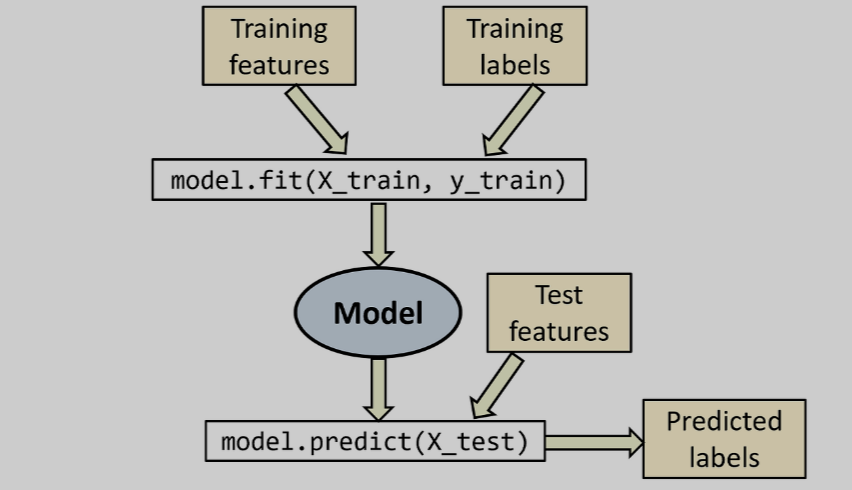

In [57]:
# Initialize your model
lr = LogisticRegression(multi_class='ovr',solver='liblinear')

# Fit your model on the training set 
model = lr.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [58]:
y_pred

array(['indian', 'japanese', 'indian', 'thai', 'japanese', 'chinese',
       'korean', 'japanese', 'indian', 'japanese', 'thai', 'chinese',
       'japanese', 'chinese', 'japanese', 'korean', 'thai', 'indian',
       'korean', 'thai', 'indian', 'thai', 'korean', 'chinese', 'thai',
       'chinese', 'chinese', 'indian', 'thai', 'thai', 'thai', 'korean',
       'korean', 'thai', 'thai', 'korean', 'indian', 'indian', 'korean',
       'thai', 'japanese', 'japanese', 'indian', 'korean', 'japanese',
       'thai', 'chinese', 'korean', 'indian', 'japanese', 'thai',
       'korean', 'korean', 'indian', 'thai', 'thai', 'indian', 'japanese',
       'thai', 'korean', 'indian', 'korean', 'indian', 'thai', 'thai',
       'chinese', 'thai', 'indian', 'korean', 'chinese', 'japanese',
       'indian', 'thai', 'japanese', 'indian', 'japanese', 'korean',
       'japanese', 'indian', 'chinese', 'chinese', 'indian', 'japanese',
       'thai', 'chinese', 'chinese', 'japanese', 'chinese', 'chinese',
       

In [59]:
# change prediction to df
pd.DataFrame(y_pred, columns=['cuisine'])

,cuisine
0,indian
1,japanese
2,indian
3,thai
4,japanese
...,...
794,japanese
795,chinese
796,chinese
797,indian


What is our original y_test?

In [60]:
y_test

1760      indian
3015    japanese
1770      indian
3994        thai
2099      korean
          ...   
1602      korean
2509     chinese
2481     chinese
1869      indian
423         thai
Name: cuisine, Length: 799, dtype: object

 - How do we check the accuracy?

In [61]:
ccuracy = model.score(X_test, y_test)
print ("Accuracy is {}".format(accuracy))

Accuracy is 0.7934918648310388


> Try a different solver like lbfgs, which is often set as default

## Decision Tree Classifier


In [62]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
model = dt.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print ("Accuracy is {}".format(accuracy))

Accuracy is 0.7496871088861077


In [63]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
model = rf.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print ("Accuracy is {}".format(accuracy))


Accuracy is 0.818523153942428


## General Template

In [64]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression  # or any other model

# Load your data
# X, y = load_your_data()

# Preprocess your data (optional)
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize your model
model = LogisticRegression(multi_class='ovr', solver='liblinear')  # or any other model

# Fit your model to the training data
model.fit(X_train, y_train)

# Predict the labels of the test data
y_pred = model.predict(X_test)

# Evaluate your model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy is {}".format(accuracy))

Accuracy is 0.7934918648310388


Digging deeper, you can check for the accuracy of this prediction:

Get more detail by printing a classification report, as you did in the regression lessons:

In [65]:
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     chinese       0.74      0.68      0.71       151
      indian       0.89      0.92      0.90       165
    japanese       0.76      0.79      0.77       149
      korean       0.78      0.74      0.76       164
        thai       0.79      0.84      0.81       170

    accuracy                           0.79       799
   macro avg       0.79      0.79      0.79       799
weighted avg       0.79      0.79      0.79       799

